# Heart Disease

Heart Disease | Prediction
- | -
<img src="health-robot.jpg" width="240px"> | <img src="heart-attack.jpg" width="300px"> 

In [1]:
ls

AHeartDisease.ipynb  heart-attack.jpg  heart-disease-uci.zip
health-robot.jpg     heart.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys

import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers.core import Dense

/home/invitado/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [3]:
trainx = pd.read_csv("./heart.csv")

In [4]:
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
trainx.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h1>Significado de los atributos</h1>
<ul>
    <li>
        <h3>Age:</h3>
        Edad de la persona
    </li>
    <li>
        <h3>Sex:</h3>
        Sexo de la persona (1 para hombre, 0 para mujer)
    </li>
    <li>
        <h3>cp:</h3>
        Chest pain experienced - Experencia de dolor en el pecho
        0: asymptomatic
        1: angina atipico
        2: Dolor no anginal
        3: angina tipico
    </li>
        <li>
        <h3>trestbps:</h3>
        La presión arterial en reposo de la persona
    </li>
        <li>
        <h3>chol:</h3>
        Colesterol de la persona (mg/dl)
    </li>
        <li>
        <h3>fbs:</h3>
        El azúcar en sangre de la persona en ayunas (> 120 mg/dl, 1: true; 0: false) 
    </li>
        <li>
        <h3>restecg:</h3>
        resting electrocardiographic results
        0: showing probable or definite left ventricular hypertrophy by Estes' criteria
        1: normal
        2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    </li>
        <li>
        <h3>thalach:</h3>
        El registro de la frecuencia cardíaca máxima de la persona
    </li>
        <li>
        <h3>Exang:</h3>
         Angina inducida por ejercicio (1: si; 0: no)
    </li>
    <li>
        <h3>oldpeak:</h3>
         Depresión del ST inducida por el ejercicio relativo al descanso
    </li>
    <li>
        <h3>slope:</h3>
         la pendiente del segmento pico del ejercicio ST
         0: pendiente descendente
         1: plano
         2: ascenso
    </li>
    <li>
        <h3>ca:</h3>
         El número de vasos principales (0-3)
    </li>
    <li>
        <h3>thal:</h3>
         Trastorno sanguíneo conocido como talasemia
         1: defecto fijo
         2: normal;
         7: defecto reversible
    </li>
       <li>
        <h3>Desease:</h3>
         0: Enfermo
         1: No enfermo
    </li> 
    
</ul>

In [6]:
# NAS
# trainx["age"] = trainx["age"].fillna(trainx["age"].median())
# trainx["cp"] = trainx["cp"].fillna(trainx["cp"].median())
# trainx["trestbps"] = trainx["trestbps"].fillna(trainx["trestbps"].median())
# trainx["chol"] = trainx["chol"].fillna(trainx["chol"].median())
# trainx["thalach"] = trainx["thalach"].fillna(trainx["thalach"].median())
# trainx["oldpeak"] = trainx["oldpeak"].fillna(trainx["oldpeak"].median())

In [7]:
# Category types
# trainx['sex'] = trainx['sex'].astype('category')
# trainx['cp'] = trainx['cp'].astype('category')
# trainx['fbs'] = trainx['fbs'].astype('category')
# trainx['restecg'] = trainx['restecg'].astype('category')
# trainx['exang'] = trainx['exang'].astype('category')
# trainx['slope'] = trainx['slope'].astype('category')
# trainx['thal'] = trainx['thal'].astype('category')
# trainx['ca'] = trainx['ca'].astype('category')
# trainx['target'] = trainx['target'].astype('category')

print(trainx.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [8]:
print(trainx.isnull().sum())
print("------------------")
print(trainx.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
------------------
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


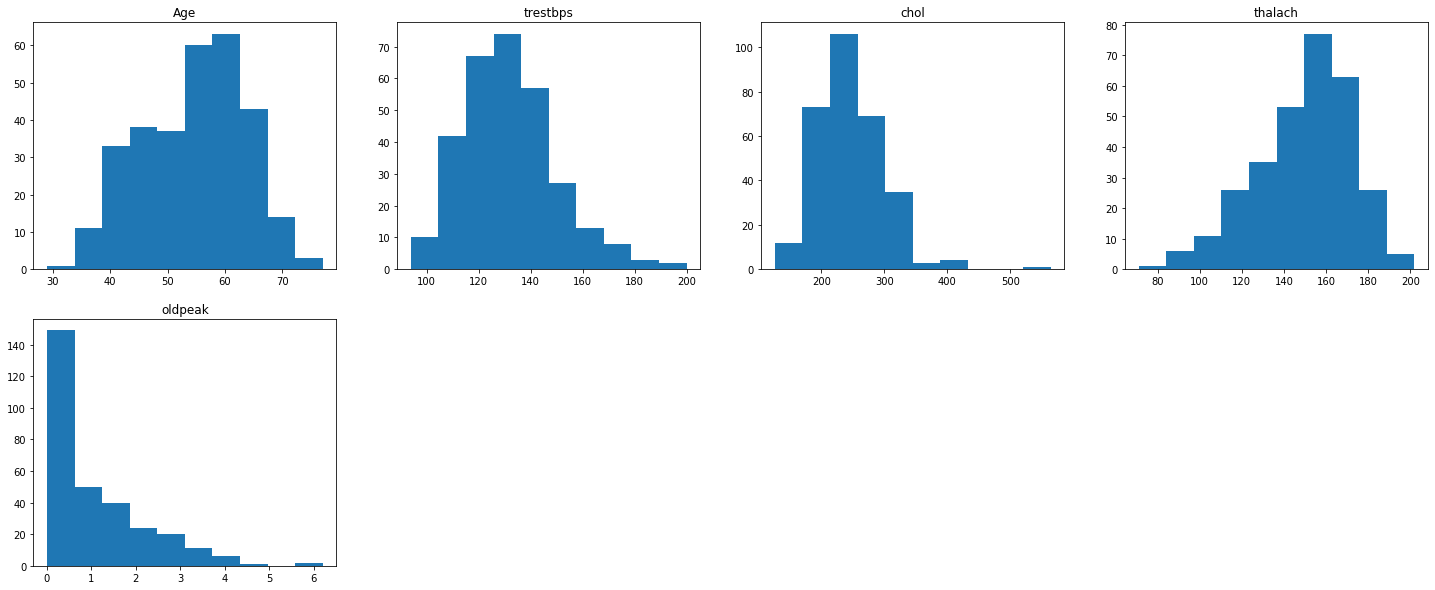

In [9]:
counts, bins = np.histogram(trainx["age"])
counts2, bins2 = np.histogram(trainx["trestbps"])
counts3, bins3 = np.histogram(trainx["chol"])
counts4, bins4 = np.histogram(trainx["thalach"])
counts5, bins5 = np.histogram(trainx["oldpeak"])



plt.figure(figsize=(25,10))

plt.subplot(2, 4, 1)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Age')
plt.ylabel('')

plt.subplot(2, 4, 2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.title('trestbps')
plt.ylabel('')

plt.subplot(2, 4, 3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.title('chol')
plt.ylabel('')

plt.subplot(2, 4, 4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.title('thalach')
plt.ylabel('')

plt.subplot(2, 4, 5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.title('oldpeak')
plt.ylabel('')


plt.show()

Text(0.5, 1.0, 'Target')

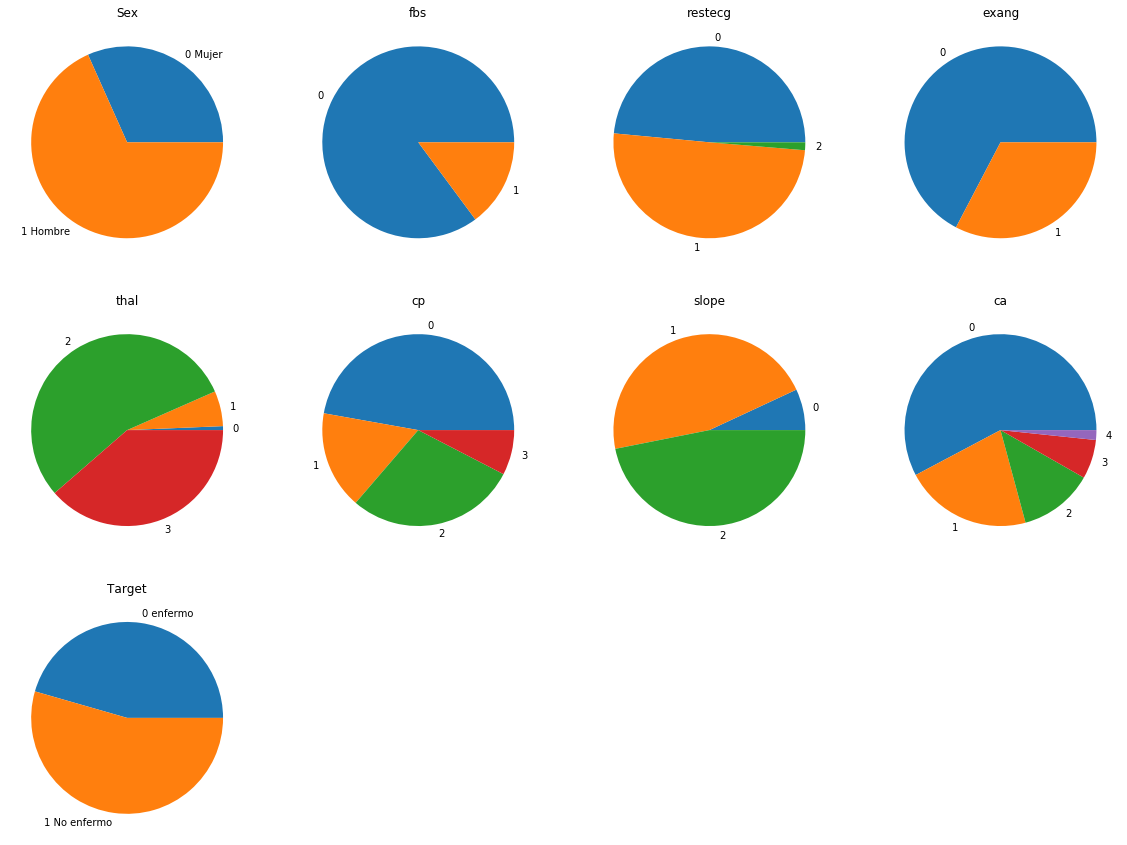

In [10]:
plt.figure(figsize=(20,15))

plt.subplot(3, 4, 1)
labels = ["0 Mujer", "1 Hombre"]
values = [trainx["sex"].count() - trainx["sex"].sum(), trainx["sex"].sum()]
plt.pie(values, labels=labels)
plt.title('Sex')

plt.subplot(3, 4, 2)
labels = ["0", "1"]
values = [trainx["fbs"].count() - trainx["fbs"].sum(), trainx["fbs"].sum()]
plt.pie(values, labels=labels)
plt.title('fbs')

plt.subplot(3, 4, 3)
labels = ["0", "1", "2"]
values = [trainx["restecg"][trainx["restecg"]==0].count(), trainx["restecg"][trainx["restecg"]==1].count(), trainx["restecg"][trainx["restecg"]==2].count()]
plt.pie(values, labels=labels)
plt.title('restecg')

plt.subplot(3, 4, 4)
labels = ["0", "1"]
values = [trainx["exang"].count() - trainx["exang"].sum(), trainx["exang"].sum()]
plt.pie(values, labels=labels)
plt.title('exang')

plt.subplot(3, 4, 5)
labels = ["0", "1", "2", "3"]
values = [trainx["thal"][trainx["thal"]==0].count(), trainx["thal"][trainx["thal"]==1].count(), trainx["thal"][trainx["thal"]==2].count(), trainx["thal"][trainx["thal"]==3].count()]
plt.pie(values, labels=labels)
plt.title('thal')

plt.subplot(3, 4, 6)
labels = ["0", "1", "2", "3"]
values = [trainx["cp"][trainx["cp"]==0].count(), trainx["cp"][trainx["cp"]==1].count(), trainx["cp"][trainx["cp"]==2].count(), trainx["cp"][trainx["cp"]==3].count()]
plt.pie(values, labels=labels)
plt.title('cp')

plt.subplot(3, 4, 7)
labels = ["0", "1", "2"]
values = [trainx["slope"][trainx["slope"]==0].count(), trainx["slope"][trainx["slope"]==1].count(), trainx["slope"][trainx["slope"]==2].count()]
plt.pie(values, labels=labels)
plt.title('slope')

plt.subplot(3, 4, 8)
labels = ["0", "1", "2", "3", "4"]
values = [trainx["ca"][trainx["ca"]==0].count(), trainx["ca"][trainx["ca"]==1].count(), trainx["ca"][trainx["ca"]==2].count(), trainx["ca"][trainx["ca"]==3].count(), trainx["ca"][trainx["ca"]==4].count()]
plt.pie(values, labels=labels)
plt.title('ca')

plt.subplot(3, 4, 9)
labels = ["0 enfermo", "1 No enfermo"]
values = [trainx["target"][trainx["target"]==0].count(), trainx["target"][trainx["target"]==1].count()]
plt.pie(values, labels=labels)
plt.title('Target')



In [11]:
# atributos y target
features = trainx[["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]].values
target = trainx["target"].values

# Diviendo datos para entrenar es probar
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2, train_size=0.28)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(84, 13) (84,)
(61, 13) (61,)


# Trees

In [12]:
model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5)
#model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5, random_state = 1)
# model1 = tree.DecisionTreeClassifier()

model1 = model1.fit(trainX, trainY)

#Print the score on the train data
print("Train: " + str(model1.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model1.score(testX, testY)))

# Para árboles
# print(confusion_matrix(model1.predict(testX), testY))

# y_pred = model1.predict(testX)
# print(y_pred)

# print("Accuracy:",metrics.accuracy_score(testY, y_pred))

confusion_matrix(model1.predict(testX), testY)

Train: 0.9523809523809523
Test: 0.8032786885245902


array([[19,  8],
       [ 4, 30]])

<h2>Gráfica de Importancias y Árbol</h2>


[0.08892841 0.40809578 0.0159083  0.08792212 0.02023121 0.14095656
 0.1120745  0.         0.         0.04495825 0.         0.
 0.08092486] 0.8184818481848185


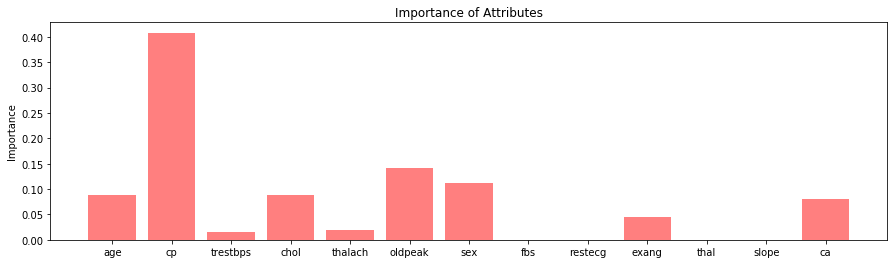

In [13]:
importances = model1.feature_importances_
print(importances, model1.score(features, target))

features_col = ["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]

y_values = np.arange(len(features_col))

plt.figure(figsize=(15,4))
plt.bar(y_values, importances, align='center', alpha=0.5, color='r')
plt.xticks(y_values, features_col)
plt.ylabel('Importance')
plt.title('Importance of Attributes')

plt.show()

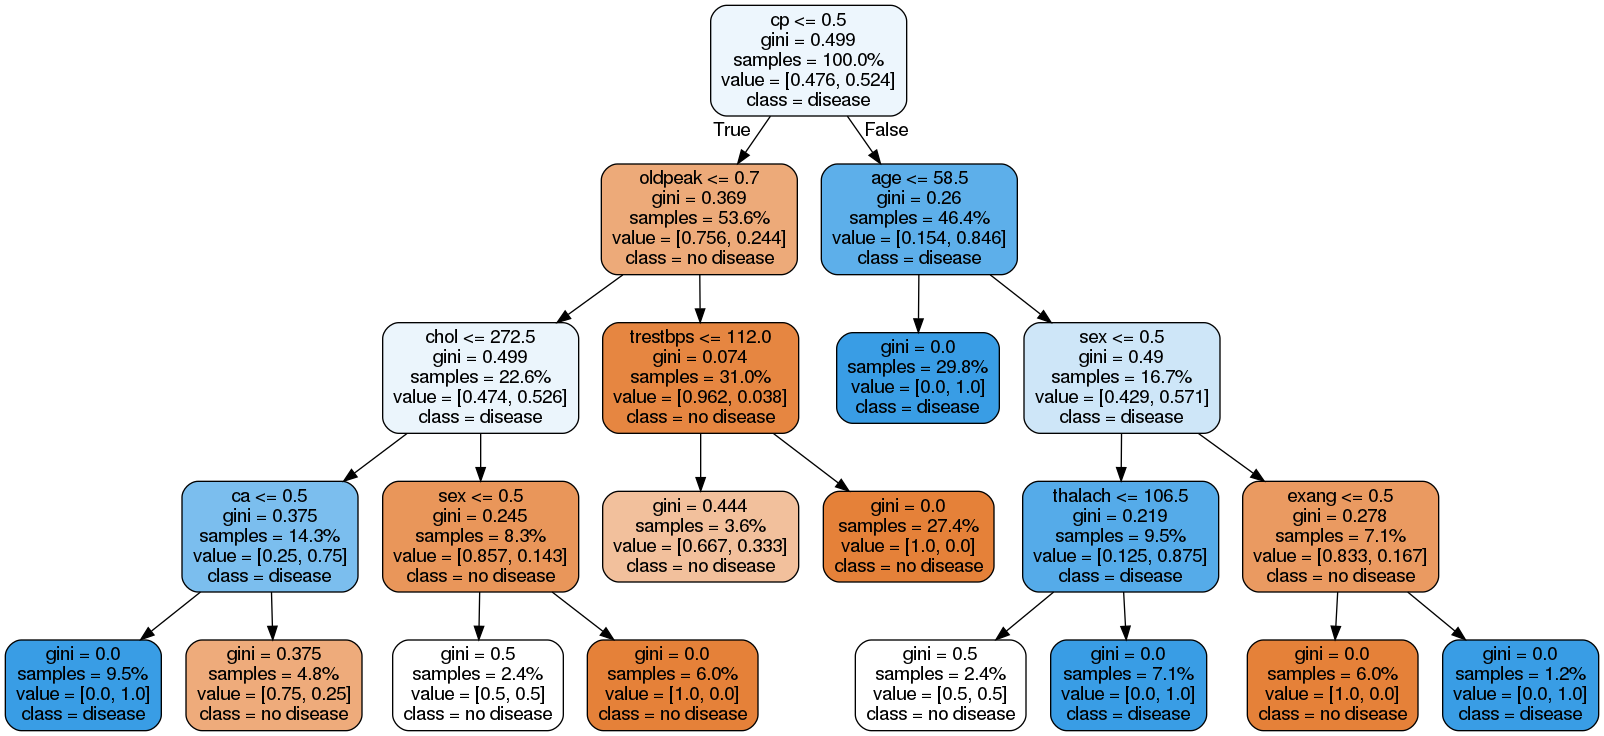

In [14]:

# c = -1;
# for i in importances:
#     c = c + 1
#     if(i == 0.0):
#         features_col.remove(features_col[c])
#         c = c - 1
    
        
        
# print(features_col)

y_train_str = trainY.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

dot_data = StringIO()
export_graphviz(model1, out_file = dot_data, filled = True, rounded = True, proportion = True,
                feature_names = features_col, 
                class_names = y_train_str)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


# Naive Bayes

In [15]:
model2 = gnb.fit(trainX, trainY)


#Print the score on the train data
print("Train: " + str(model2.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model2.score(testX, testY)))

# y_pred2 = model2.predict(testX)
# print(y_pred2)
# print("Accuracy: ",metrics.accuracy_score(testY, y_pred2))
# print(metrics.classification_report(testY, y_pred2))
# from sklearn.metrics import confusion_matrix

confusion_matrix(model2.predict(testX), testY)

Train: 0.8571428571428571
Test: 0.8360655737704918


array([[18,  5],
       [ 5, 33]])

# Neural Network

In [16]:
# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

model3 = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=5000,
                     hidden_layer_sizes = (1), random_state=1, verbose = True)

model3.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training")
print(model3.score(trainXX, trainY))
print(confusion_matrix(model3.predict(trainXX), trainY))

#Print the score on the test data
print("\nOn test")
print(model3.score(testXX, testY))
print(confusion_matrix(model3.predict(testXX), testY))

On training
0.9523809523809523
[[36  0]
 [ 4 44]]

On test
0.819672131147541
[[18  6]
 [ 5 32]]


In [70]:
network = Sequential()
network.add(Dense(13, input_dim=13, activation='sigmoid'))
network.add(Dense(1, input_dim=13, activation='sigmoid'))
network.add(Dense(13, input_dim=13, activation='sigmoid'))


# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
network.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])


network.fit(trainX, trainY, epochs=1000)

scoreT = network.evaluate(testX, testY)
scoreE = network.evaluate(trainX, trainY)

print("Score del test")
print("%s: %.2f%%" % (network.metrics_names[1], scoreT[1]*100))
print("Score del entrenamiento")
print("%s: %.2f%%" % (network.metrics_names[1], scoreE[1]*100))

# predictions = network.predict_classes(testX)





Epoch 1/1000
84/84 [==============================] - 1s 16ms/step - loss: 2.5149 - binary_accuracy: 0.5128
Epoch 2/1000
84/84 [==============================] - 0s 109us/step - loss: 2.5112 - binary_accuracy: 0.5137
Epoch 3/1000
84/84 [==============================] - 0s 152us/step - loss: 2.5070 - binary_accuracy: 0.5092
Epoch 4/1000
84/84 [==============================] - 0s 137us/step - loss: 2.5028 - binary_accuracy: 0.5092
Epoch 5/1000
84/84 [==============================] - 0s 89us/step - loss: 2.4985 - binary_accuracy: 0.5092
Epoch 6/1000
84/84 [==============================] - 0s 172us/step - loss: 2.4941 - binary_accuracy: 0.5092
Epoch 7/1000
84/84 [==============================] - 0s 191us/step - loss: 2.4897 - binary_accuracy: 0.5092
Epoch 8/1000
84/84 [==============================] - 0s 235us/step - loss: 2.4853 - binary_accuracy: 0.5092
Epoch 9/1000
84/84 [==============================] - 0s 176us/step - loss: 2.4809 - binary_accuracy: 0.5092
Epoch 10/1000
84/84 [

84/84 [==============================] - 0s 107us/step - loss: 2.1871 - binary_accuracy: 0.4908
Epoch 76/1000
84/84 [==============================] - 0s 140us/step - loss: 2.1829 - binary_accuracy: 0.4908
Epoch 77/1000
84/84 [==============================] - 0s 100us/step - loss: 2.1786 - binary_accuracy: 0.4908
Epoch 78/1000
84/84 [==============================] - 0s 155us/step - loss: 2.1744 - binary_accuracy: 0.4908
Epoch 79/1000
84/84 [==============================] - 0s 140us/step - loss: 2.1701 - binary_accuracy: 0.4863
Epoch 80/1000
84/84 [==============================] - 0s 170us/step - loss: 2.1659 - binary_accuracy: 0.4863
Epoch 81/1000
84/84 [==============================] - 0s 107us/step - loss: 2.1617 - binary_accuracy: 0.4835
Epoch 82/1000
84/84 [==============================] - 0s 168us/step - loss: 2.1575 - binary_accuracy: 0.4835
Epoch 83/1000
84/84 [==============================] - 0s 122us/step - loss: 2.1532 - binary_accuracy: 0.4835
Epoch 84/1000
84/84 [===

84/84 [==============================] - 0s 135us/step - loss: 1.8850 - binary_accuracy: 0.4835
Epoch 150/1000
84/84 [==============================] - 0s 119us/step - loss: 1.8811 - binary_accuracy: 0.4835
Epoch 151/1000
84/84 [==============================] - 0s 140us/step - loss: 1.8772 - binary_accuracy: 0.4835
Epoch 152/1000
84/84 [==============================] - 0s 101us/step - loss: 1.8733 - binary_accuracy: 0.4835
Epoch 153/1000
84/84 [==============================] - 0s 118us/step - loss: 1.8694 - binary_accuracy: 0.4835
Epoch 154/1000
84/84 [==============================] - 0s 114us/step - loss: 1.8656 - binary_accuracy: 0.4835
Epoch 155/1000
84/84 [==============================] - 0s 103us/step - loss: 1.8617 - binary_accuracy: 0.4835
Epoch 156/1000
84/84 [==============================] - 0s 135us/step - loss: 1.8578 - binary_accuracy: 0.4835
Epoch 157/1000
84/84 [==============================] - 0s 154us/step - loss: 1.8540 - binary_accuracy: 0.4835
Epoch 158/1000
8

Epoch 223/1000
84/84 [==============================] - 0s 109us/step - loss: 1.6151 - binary_accuracy: 0.4835
Epoch 224/1000
84/84 [==============================] - 0s 127us/step - loss: 1.6118 - binary_accuracy: 0.4835
Epoch 225/1000
84/84 [==============================] - 0s 101us/step - loss: 1.6084 - binary_accuracy: 0.4835
Epoch 226/1000
84/84 [==============================] - 0s 134us/step - loss: 1.6051 - binary_accuracy: 0.4835
Epoch 227/1000
84/84 [==============================] - 0s 142us/step - loss: 1.6018 - binary_accuracy: 0.4835
Epoch 228/1000
84/84 [==============================] - 0s 114us/step - loss: 1.5984 - binary_accuracy: 0.4835
Epoch 229/1000
84/84 [==============================] - 0s 111us/step - loss: 1.5951 - binary_accuracy: 0.4835
Epoch 230/1000
84/84 [==============================] - 0s 147us/step - loss: 1.5918 - binary_accuracy: 0.4835
Epoch 231/1000
84/84 [==============================] - 0s 146us/step - loss: 1.5885 - binary_accuracy: 0.4835
E

84/84 [==============================] - 0s 126us/step - loss: 1.3943 - binary_accuracy: 0.4835
Epoch 297/1000
84/84 [==============================] - 0s 109us/step - loss: 1.3916 - binary_accuracy: 0.4835
Epoch 298/1000
84/84 [==============================] - 0s 96us/step - loss: 1.3889 - binary_accuracy: 0.4835
Epoch 299/1000
84/84 [==============================] - 0s 125us/step - loss: 1.3863 - binary_accuracy: 0.4835
Epoch 300/1000
84/84 [==============================] - 0s 127us/step - loss: 1.3836 - binary_accuracy: 0.4835
Epoch 301/1000
84/84 [==============================] - 0s 126us/step - loss: 1.3810 - binary_accuracy: 0.4835
Epoch 302/1000
84/84 [==============================] - 0s 108us/step - loss: 1.3784 - binary_accuracy: 0.4835
Epoch 303/1000
84/84 [==============================] - 0s 132us/step - loss: 1.3758 - binary_accuracy: 0.4835
Epoch 304/1000
84/84 [==============================] - 0s 124us/step - loss: 1.3732 - binary_accuracy: 0.4835
Epoch 305/1000
84

84/84 [==============================] - 0s 92us/step - loss: 1.2216 - binary_accuracy: 0.4835
Epoch 371/1000
84/84 [==============================] - 0s 143us/step - loss: 1.2196 - binary_accuracy: 0.4835
Epoch 372/1000
84/84 [==============================] - 0s 110us/step - loss: 1.2176 - binary_accuracy: 0.4835
Epoch 373/1000
84/84 [==============================] - 0s 102us/step - loss: 1.2156 - binary_accuracy: 0.4835
Epoch 374/1000
84/84 [==============================] - 0s 107us/step - loss: 1.2137 - binary_accuracy: 0.4835
Epoch 375/1000
84/84 [==============================] - 0s 118us/step - loss: 1.2117 - binary_accuracy: 0.4835
Epoch 376/1000
84/84 [==============================] - 0s 141us/step - loss: 1.2097 - binary_accuracy: 0.4835
Epoch 377/1000
84/84 [==============================] - 0s 140us/step - loss: 1.2078 - binary_accuracy: 0.4835
Epoch 378/1000
84/84 [==============================] - 0s 97us/step - loss: 1.2059 - binary_accuracy: 0.4835
Epoch 379/1000
84/

84/84 [==============================] - 0s 103us/step - loss: 1.0947 - binary_accuracy: 0.4835
Epoch 445/1000
84/84 [==============================] - 0s 95us/step - loss: 1.0932 - binary_accuracy: 0.4835
Epoch 446/1000
84/84 [==============================] - 0s 111us/step - loss: 1.0918 - binary_accuracy: 0.4835
Epoch 447/1000
84/84 [==============================] - 0s 230us/step - loss: 1.0903 - binary_accuracy: 0.4835
Epoch 448/1000
84/84 [==============================] - 0s 141us/step - loss: 1.0889 - binary_accuracy: 0.4835
Epoch 449/1000
84/84 [==============================] - 0s 137us/step - loss: 1.0875 - binary_accuracy: 0.4835
Epoch 450/1000
84/84 [==============================] - 0s 106us/step - loss: 1.0860 - binary_accuracy: 0.4835
Epoch 451/1000
84/84 [==============================] - 0s 115us/step - loss: 1.0846 - binary_accuracy: 0.4835
Epoch 452/1000
84/84 [==============================] - 0s 120us/step - loss: 1.0832 - binary_accuracy: 0.4835
Epoch 453/1000
84

84/84 [==============================] - 0s 121us/step - loss: 1.0028 - binary_accuracy: 0.4835
Epoch 519/1000
84/84 [==============================] - 0s 94us/step - loss: 1.0018 - binary_accuracy: 0.4835
Epoch 520/1000
84/84 [==============================] - 0s 113us/step - loss: 1.0007 - binary_accuracy: 0.4835
Epoch 521/1000
84/84 [==============================] - 0s 161us/step - loss: 0.9997 - binary_accuracy: 0.4835
Epoch 522/1000
84/84 [==============================] - 0s 129us/step - loss: 0.9987 - binary_accuracy: 0.4835
Epoch 523/1000
84/84 [==============================] - 0s 111us/step - loss: 0.9976 - binary_accuracy: 0.4835
Epoch 524/1000
84/84 [==============================] - 0s 127us/step - loss: 0.9966 - binary_accuracy: 0.4835
Epoch 525/1000
84/84 [==============================] - 0s 118us/step - loss: 0.9956 - binary_accuracy: 0.4835
Epoch 526/1000
84/84 [==============================] - 0s 121us/step - loss: 0.9946 - binary_accuracy: 0.4835
Epoch 527/1000
84

84/84 [==============================] - 0s 104us/step - loss: 0.9362 - binary_accuracy: 0.4835
Epoch 593/1000
84/84 [==============================] - 0s 104us/step - loss: 0.9354 - binary_accuracy: 0.4835
Epoch 594/1000
84/84 [==============================] - 0s 112us/step - loss: 0.9347 - binary_accuracy: 0.4835
Epoch 595/1000
84/84 [==============================] - 0s 129us/step - loss: 0.9339 - binary_accuracy: 0.4835
Epoch 596/1000
84/84 [==============================] - 0s 116us/step - loss: 0.9332 - binary_accuracy: 0.4835
Epoch 597/1000
84/84 [==============================] - 0s 218us/step - loss: 0.9324 - binary_accuracy: 0.4835
Epoch 598/1000
84/84 [==============================] - 0s 141us/step - loss: 0.9316 - binary_accuracy: 0.4835
Epoch 599/1000
84/84 [==============================] - 0s 106us/step - loss: 0.9309 - binary_accuracy: 0.4835
Epoch 600/1000
84/84 [==============================] - 0s 122us/step - loss: 0.9302 - binary_accuracy: 0.4835
Epoch 601/1000
8

84/84 [==============================] - 0s 118us/step - loss: 0.8872 - binary_accuracy: 0.4835
Epoch 667/1000
84/84 [==============================] - 0s 118us/step - loss: 0.8866 - binary_accuracy: 0.4835
Epoch 668/1000
84/84 [==============================] - 0s 104us/step - loss: 0.8860 - binary_accuracy: 0.4835
Epoch 669/1000
84/84 [==============================] - 0s 142us/step - loss: 0.8855 - binary_accuracy: 0.4835
Epoch 670/1000
84/84 [==============================] - 0s 140us/step - loss: 0.8849 - binary_accuracy: 0.4835
Epoch 671/1000
84/84 [==============================] - 0s 105us/step - loss: 0.8844 - binary_accuracy: 0.4835
Epoch 672/1000
84/84 [==============================] - 0s 112us/step - loss: 0.8838 - binary_accuracy: 0.4835
Epoch 673/1000
84/84 [==============================] - 0s 134us/step - loss: 0.8832 - binary_accuracy: 0.4835
Epoch 674/1000
84/84 [==============================] - 0s 96us/step - loss: 0.8827 - binary_accuracy: 0.4835
Epoch 675/1000
84

84/84 [==============================] - 0s 113us/step - loss: 0.8505 - binary_accuracy: 0.4835
Epoch 741/1000
84/84 [==============================] - 0s 148us/step - loss: 0.8500 - binary_accuracy: 0.4835
Epoch 742/1000
84/84 [==============================] - 0s 152us/step - loss: 0.8496 - binary_accuracy: 0.4835
Epoch 743/1000
84/84 [==============================] - 0s 98us/step - loss: 0.8492 - binary_accuracy: 0.4835
Epoch 744/1000
84/84 [==============================] - 0s 110us/step - loss: 0.8487 - binary_accuracy: 0.4835
Epoch 745/1000
84/84 [==============================] - ETA: 0s - loss: 0.8488 - binary_accuracy: 0.521 - 0s 162us/step - loss: 0.8483 - binary_accuracy: 0.4835
Epoch 746/1000
84/84 [==============================] - 0s 137us/step - loss: 0.8479 - binary_accuracy: 0.4835
Epoch 747/1000
84/84 [==============================] - 0s 116us/step - loss: 0.8475 - binary_accuracy: 0.4835
Epoch 748/1000
84/84 [==============================] - 0s 120us/step - loss: 

84/84 [==============================] - 0s 128us/step - loss: 0.8228 - binary_accuracy: 0.4835
Epoch 814/1000
84/84 [==============================] - 0s 93us/step - loss: 0.8224 - binary_accuracy: 0.4835
Epoch 815/1000
84/84 [==============================] - 0s 121us/step - loss: 0.8221 - binary_accuracy: 0.4835
Epoch 816/1000
84/84 [==============================] - 0s 126us/step - loss: 0.8218 - binary_accuracy: 0.4835
Epoch 817/1000
84/84 [==============================] - 0s 125us/step - loss: 0.8214 - binary_accuracy: 0.4835
Epoch 818/1000
84/84 [==============================] - 0s 119us/step - loss: 0.8211 - binary_accuracy: 0.4835
Epoch 819/1000
84/84 [==============================] - 0s 159us/step - loss: 0.8208 - binary_accuracy: 0.4835
Epoch 820/1000
84/84 [==============================] - 0s 116us/step - loss: 0.8204 - binary_accuracy: 0.4835
Epoch 821/1000
84/84 [==============================] - 0s 101us/step - loss: 0.8201 - binary_accuracy: 0.4835
Epoch 822/1000
84

84/84 [==============================] - 0s 105us/step - loss: 0.8012 - binary_accuracy: 0.4835
Epoch 887/1000
84/84 [==============================] - 0s 133us/step - loss: 0.8009 - binary_accuracy: 0.4835
Epoch 888/1000
84/84 [==============================] - 0s 103us/step - loss: 0.8006 - binary_accuracy: 0.4835
Epoch 889/1000
84/84 [==============================] - 0s 91us/step - loss: 0.8004 - binary_accuracy: 0.4835
Epoch 890/1000
84/84 [==============================] - 0s 125us/step - loss: 0.8001 - binary_accuracy: 0.4835
Epoch 891/1000
84/84 [==============================] - 0s 119us/step - loss: 0.7999 - binary_accuracy: 0.4835
Epoch 892/1000
84/84 [==============================] - 0s 94us/step - loss: 0.7996 - binary_accuracy: 0.4835
Epoch 893/1000
84/84 [==============================] - 0s 128us/step - loss: 0.7993 - binary_accuracy: 0.4835
Epoch 894/1000
84/84 [==============================] - 0s 124us/step - loss: 0.7991 - binary_accuracy: 0.4835
Epoch 895/1000
84/

84/84 [==============================] - 0s 110us/step - loss: 0.7838 - binary_accuracy: 0.4835
Epoch 961/1000
84/84 [==============================] - 0s 114us/step - loss: 0.7836 - binary_accuracy: 0.4835
Epoch 962/1000
84/84 [==============================] - 0s 142us/step - loss: 0.7834 - binary_accuracy: 0.4835
Epoch 963/1000
84/84 [==============================] - 0s 88us/step - loss: 0.7832 - binary_accuracy: 0.4835
Epoch 964/1000
84/84 [==============================] - 0s 141us/step - loss: 0.7830 - binary_accuracy: 0.4835
Epoch 965/1000
84/84 [==============================] - 0s 133us/step - loss: 0.7828 - binary_accuracy: 0.4835
Epoch 966/1000
84/84 [==============================] - 0s 118us/step - loss: 0.7826 - binary_accuracy: 0.4835
Epoch 967/1000
84/84 [==============================] - 0s 129us/step - loss: 0.7824 - binary_accuracy: 0.4835
Epoch 968/1000
84/84 [==============================] - 0s 119us/step - loss: 0.7822 - binary_accuracy: 0.4835
Epoch 969/1000
84

In [71]:
network.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 14        
_________________________________________________________________
dense_40 (Dense)             (None, 13)                26        
Total params: 222
Trainable params: 222
Non-trainable params: 0
_________________________________________________________________


In [72]:
for layer in network.layers:
    h=layer.get_weights()
    print (h)

[array([[-0.00658806, -0.15006301, -0.14852639, -0.1439749 ,  0.12114375,
        -0.43118793, -0.08168566,  0.47880107, -0.03254616,  0.06719536,
         0.18989801,  0.08490853, -0.40801534],
       [ 0.14022885, -0.20208839, -0.43205285,  0.08616662, -0.00245835,
        -0.34918833,  0.4311508 , -0.08333746, -0.46115732, -0.02375934,
         0.41406322,  0.4724699 ,  0.47324187],
       [ 0.22272013,  0.11826271,  0.06155613,  0.04615378, -0.35243064,
         0.37936765, -0.29641113, -0.18354213,  0.05392617,  0.22365224,
         0.38128412,  0.31525797, -0.17764783],
       [-0.43131074, -0.22833732,  0.13102448,  0.19930637,  0.5569606 ,
        -0.17519864,  0.33666646, -0.08137792,  0.02659982,  0.05149817,
         0.26585168, -0.13456887, -0.29077762],
       [ 0.1709944 ,  0.0286873 , -0.4697096 ,  0.08214337, -0.22470257,
        -0.4137714 ,  0.27458364, -0.13758376,  0.11729783, -0.07168606,
         0.2817101 ,  0.30388102,  0.07593554],
       [-0.41879252,  0.43476